In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [23]:
def show(image):
    cv2.imshow("image",image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [64]:
def generateHistogram(image):
    data = {}
    for i in range(256):
        data[i] = 0
    h,w = image.shape
    for i in range(w):
        for j in range(h):
            data[image[j][i]] += 1
            
#     x_range = np.arange(0,256,1)
#     plt.xlim([0,256])
#     plt.bar(x_range,data.values())
    return data

In [81]:
def defaultHistogramFunction(image):
    hist,bins = np.histogram(image.flatten(),256,[0,256])
    print(hist)
    plt.hist(image.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.show()

In [82]:
def domIntensity(imag,k):
    hist = generateHistogram(imag)
    intensities = []
    for i in range(256):
        intensities.append((i,hist[i]))
    intensities_s = sorted(a,key=lambda x: x[1],reverse=True)
    palette_list = []
    for i in range(k):
        palette_list.append(intensities_s[i][0])
#     palette_list.reverse()
    return palette_list

In [83]:
def dis(palette):
    tmp = np.ones((32,32))
    m = np.ones((320,5))*0
    palette_images = []
    for i in palette:
        palette_images.append(tmp*i)
#         palette_images.append(m)
    res = np.hstack(palette_images)
    print(palette)
    return res

In [84]:
img = cv2.imread('../images_1/histogram1.jpg',0)
show(img)

<BarContainer object of 256 artists>

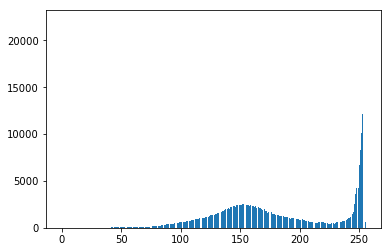

In [91]:
hist = generateHistogram(img)
# hist = np.array(hist)
plt.bar(np.arange(0,256,1),hist.values())

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     1     0     0     0     0     0
     3     2     1     1     1     2     1     0     3     3     3     5
    13    15    16    20    22    29    54    41    56    79    88    67
    85    60    74    61    64    47    61    51    63    50    65    68
    57    56    68    63    64    73    50    64    82    88    93    92
   109   111   123   125   171   156   172   190   202   210   243   228
   270   273   309   327   381   380   400   392   417   450   397   473
   485   556   542   592   586   614   624   672   665   728   725   734
   714   817   826   852   907   927   959   975   993  1006  1060  1045
  1078  1169  1168  1205  1279  1314  1409  1326  1403  1459  1453  1549
  1631  1686  1712  1770  1819  1906  1967  2003  2164  2050  2206  2229
  2288  2297  2176  2407  2434  2470  2435  2393  2521  2500  2437  2439
  2410  2390  2317  2383  2329  2285  2216  2279  2

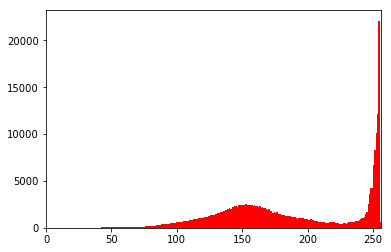

In [92]:
defaultHistogramFunction(img)

In [93]:
a = []
for i in range(256):
    a.append((i,hist[i]))
a_s = sorted(a,key=lambda x: x[1],reverse=True)

In [94]:
a_s

[(254, 22110),
 (253, 12172),
 (252, 10074),
 (251, 8341),
 (250, 6664),
 (248, 4212),
 (249, 4208),
 (247, 3623),
 (246, 2537),
 (152, 2521),
 (153, 2500),
 (149, 2470),
 (155, 2439),
 (154, 2437),
 (150, 2435),
 (148, 2434),
 (156, 2410),
 (147, 2407),
 (151, 2393),
 (157, 2390),
 (159, 2383),
 (160, 2329),
 (158, 2317),
 (145, 2297),
 (144, 2288),
 (161, 2285),
 (163, 2279),
 (143, 2229),
 (165, 2225),
 (162, 2216),
 (142, 2206),
 (146, 2176),
 (140, 2164),
 (164, 2164),
 (166, 2148),
 (167, 2146),
 (141, 2050),
 (168, 2005),
 (139, 2003),
 (170, 1991),
 (138, 1967),
 (137, 1906),
 (169, 1879),
 (171, 1828),
 (136, 1819),
 (172, 1775),
 (135, 1770),
 (134, 1712),
 (133, 1686),
 (174, 1673),
 (245, 1673),
 (176, 1634),
 (132, 1631),
 (173, 1622),
 (131, 1549),
 (175, 1528),
 (177, 1490),
 (244, 1473),
 (178, 1461),
 (129, 1459),
 (130, 1453),
 (179, 1451),
 (181, 1412),
 (126, 1409),
 (128, 1403),
 (180, 1374),
 (182, 1333),
 (127, 1326),
 (125, 1314),
 (183, 1308),
 (184, 1287),
 (1

[254, 253, 252]


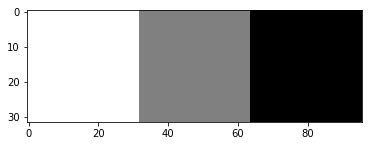

In [95]:
d = domIntensity(img,3)
r = dis(d)
plt.imshow(r,cmap='gray')
# print(r[0])